In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format='svg'#show images as vectorized not rasterized images

In [5]:
options={
    'model':'cfg/yolo.cfg',
     'load':'bin/yolov2.weights',
     'threshold':0.3    
}

In [6]:
tfnet=TFNet(options)

F:\deep learning\Andrew ng\4Convolution Neural Net\Yolo based projects\darkflow-master\darkflow\dark\darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.03702378273010254s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bn

In [16]:
# read the color image and covert to RGB

img = cv2.imread('testImage.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# use YOLO to predict the image
result = tfnet.return_predict(img)

img.shape

(183, 275, 3)

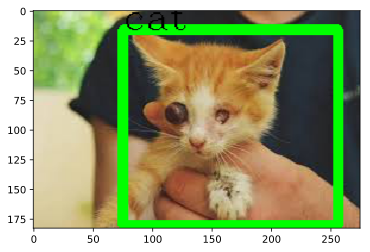

In [17]:
# pull out some info from the results

tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label = result[0]['label']


# add the box and label and display it
img = cv2.rectangle(img, tl, br, (0, 255, 0), 7)
img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 1)
plt.imshow(img)
plt.show()